In [1]:
import os

import ast

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import dataloader
from setup import *

/home/anagara8/.conda/envs/pytorch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Read Submission File
submission_model = "checkpoints_sensorium_SQZN11_5_InT_BN_track_all_sep_3t_5k_0003_GAP_6_datasets_gaussian_extra_activ_exc_scale_1_pre_training_trained"
submission_folder = "/media/data_cifs/projects/prj_sensorium/arjun/submission_files/"
live_submission_file = pd.read_csv(submission_folder + submission_model + "/submission_file_live_test.csv")
final_submission_file = pd.read_csv(submission_folder + submission_model + "/submission_file_final_test.csv")

# Read ImageID - FrameID Map:
image_id_map = np.load("/media/data_cifs/projects/prj_sensorium/old_modified/data/static26872-17-20-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/meta/trials/frame_image_id.npy")

# Images Folder:
images_folder = "/media/data_cifs/projects/prj_sensorium/old_modified/data/static26872-17-20-GrayImageNet-94c6ff995dac583098847cfecd43e7b6/data/images/"

In [3]:
# filenames = ['/media/data_cifs/projects/prj_sensorium/arjun/data/static26872-17-20-GrayImageNet-94c6ff995dac583098847cfecd43e7b6']

filenames = ['/media/data_cifs/projects/prj_sensorium/arjun/data/static21067-10-18-GrayImageNet-94c6ff995dac583098847cfecd43e7b6', 
            '/media/data_cifs/projects/prj_sensorium/arjun/data/static22846-10-16-GrayImageNet-94c6ff995dac583098847cfecd43e7b6', 
            '/media/data_cifs/projects/prj_sensorium/arjun/data/static23343-5-17-GrayImageNet-94c6ff995dac583098847cfecd43e7b6',
            '/media/data_cifs/projects/prj_sensorium/arjun/data/static23656-14-22-GrayImageNet-94c6ff995dac583098847cfecd43e7b6',
            '/media/data_cifs/projects/prj_sensorium/arjun/data/static23964-4-22-GrayImageNet-94c6ff995dac583098847cfecd43e7b6',
            '/media/data_cifs/projects/prj_sensorium/arjun/data/static26872-17-20-GrayImageNet-94c6ff995dac583098847cfecd43e7b6']

dataset_fn = 'sensorium.datasets.static_loaders'
dataset_config = {'paths': filenames,
                 'normalize': True,
                 'include_behavior': False,
                 'include_eye_position': False,
                 'batch_size': 16,
                 'scale':.25,
                 }

dataloaders = get_data(dataset_fn, dataset_config)

# Working with Sensorium data
dataset_name = '26872-17-20'

test_dataset = dataloaders['test']['22846-10-16'].dataset

In [4]:
len(test_dataset[0].responses)

7344

In [5]:
# dataset_names = ['21067-10-18', '22846-10-16', '23343-5-17', '23656-14-22', '23964-4-22', '26872-17-20']
len(dataloaders['test']['22846-10-16'].dataset)

5997

In [6]:
len(dataloaders['test']['22846-10-16'].dataset[0].responses) #'22846-10-16', '23343-5-17', '23656-14-22', '23964-4-22', '26872-17-20']

7344

In [7]:
#Setting Parameters
prj_name = "checkpoints_sensorium_SQZN11_5_InT_BN_track_all_sep_3t_5k_0003_GAP_6_datasets_gaussian_extra_activ_exc_scale_1"
test_mode = False
val_mode = True
continue_training = False

direct_training = False
fine_tuning = False
base_freeze = False

weight_decay = 1e-4
hidden_size = 128
timesteps = 3
kernel_size = 5
pre_kernel_size = 5
num_epochs = 1500

VGG_bool = True
freeze_VGG = False
HMAX_bool = False
simple_ff_bool = False
sensorium_ff_bool = False

n_ori = 12
n_scales = 9

InT_bool = True
batchnorm_bool = True
gaussian_bool = True
visualize_bool = False

orthogonal_init = True
exp_weight = False
noneg_constraint = False
clamp_weights = False
plot_weights = True

corr_loss = False
simple_to_complex = False
simple_to_complex_gamma = False

scale_image = 1

n_neurons = 7776
n_neurons_list = [8372, 7344, 7334, 8107, 8098]
batch_size_per_gpu_train = 32
batch_size_per_gpu_val = 128
lr = 0.003  

batch_size_per_gpu = 16
n_gpus = 1

Getting the dataloader
Got the dataloader
self.parameter_dict :  {'prj_name': 'checkpoints_sensorium_SQZN11_5_InT_BN_track_all_sep_3t_5k_0003_GAP_6_datasets_gaussian_extra_activ_exc_scale_1', 'lr': 0.003, 'weight_decay': 0.0001, 'n_neurons': [8372, 7344, 7334, 8107, 8098], 'hidden_size': 128, 'timesteps': 3, 'kernel_size': 5, 'pre_kernel_size': 5, 'VGG_bool': True, 'freeze_VGG': False, 'InT_bool': True, 'batchnorm_bool': True, 'orthogonal_init': True, 'exp_weight': False, 'noneg_constraint': False, 'visualize_bool': False, 'gaussian_bool': True, 'sensorium_ff_bool': False, 'clamp_weights': False, 'plot_weights': True, 'corr_loss': False, 'HMAX_bool': False, 'simple_to_complex': False, 'n_ori': 12, 'n_scales': 9, 'simple_ff_bool': False, 'simple_to_complex_gamma': False, 'scale_image': 1, 'shifter_bool': None, 'sensorium_plus': None}
Getting the train dataloader
Got the train dataloader
Getting the val dataloader
Got the val dataloader
Going to recurrent_circuit
Conv2d(3, 64, kernel_siz

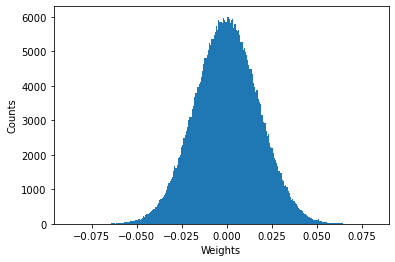

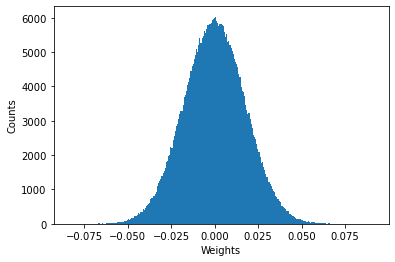

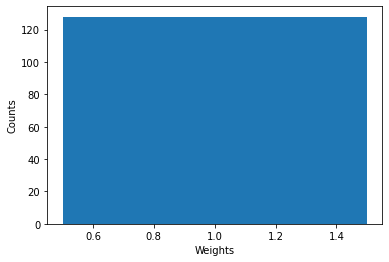

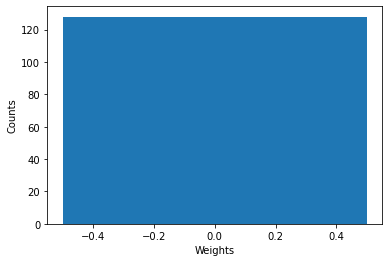

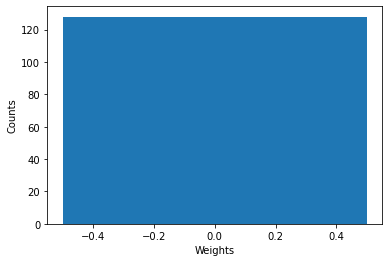

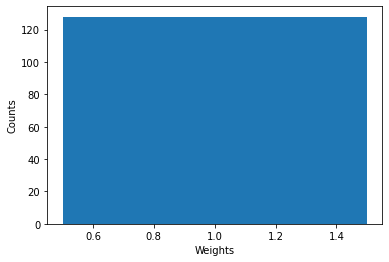

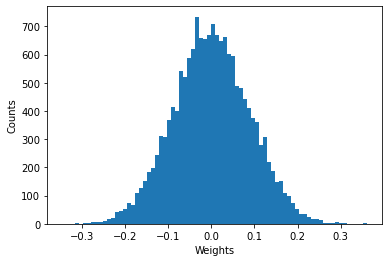

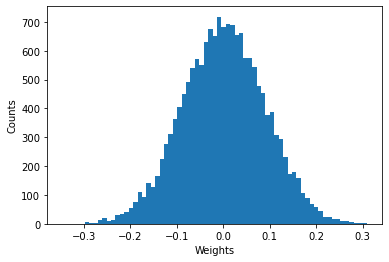

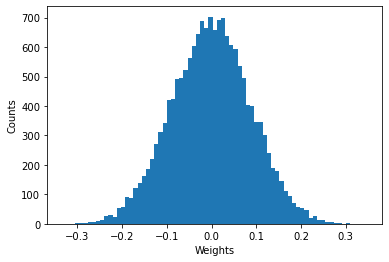

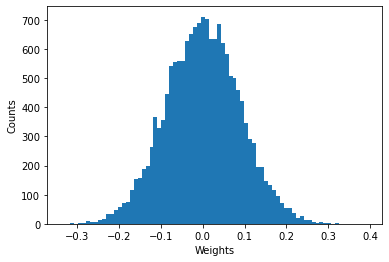

self.parameter_dict :  {'prj_name': "'checkpoints_sensorium_SQZN11_5_InT_BN_track_all_sep_3t_5k_0003_GAP_6_datasets_gaussian_extra_activ_exc_scale_1'_pre_training", 'lr': 0.003, 'weight_decay': 0.0001, 'n_neurons': [8372, 7344, 7334, 8107, 8098, 7776], 'hidden_size': 128, 'timesteps': 3, 'kernel_size': 5, 'pre_kernel_size': 5, 'VGG_bool': True, 'freeze_VGG': False, 'InT_bool': True, 'batchnorm_bool': True, 'orthogonal_init': True, 'exp_weight': False, 'noneg_constraint': False, 'visualize_bool': False, 'gaussian_bool': True, 'sensorium_ff_bool': False, 'clamp_weights': False, 'plot_weights': True, 'corr_loss': False, 'HMAX_bool': False, 'simple_to_complex': False, 'n_ori': 12, 'n_scales': 9, 'simple_ff_bool': False, 'simple_to_complex_gamma': False, 'scale_image': 1.0, 'shifter_bool': None, 'sensorium_plus': None}
Getting the train dataloader
Got the train dataloader
Getting the val dataloader
Got the val dataloader
Going to recurrent_circuit
Conv2d(3, 64, kernel_size=(3, 3), stride=(2

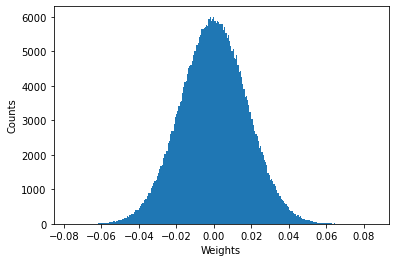

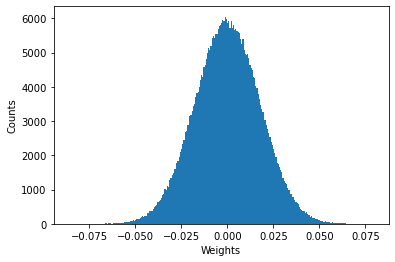

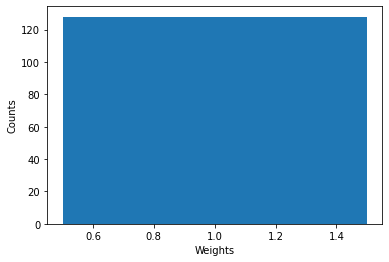

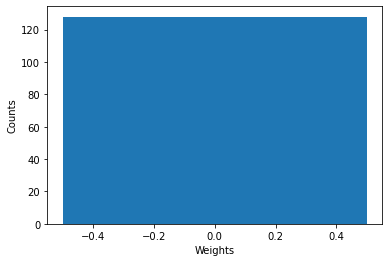

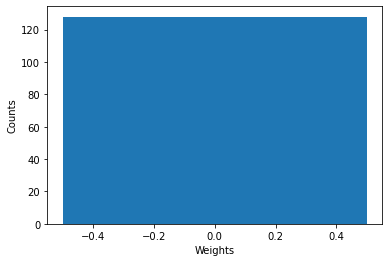

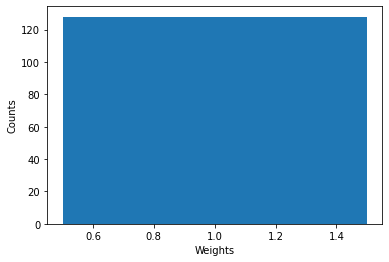

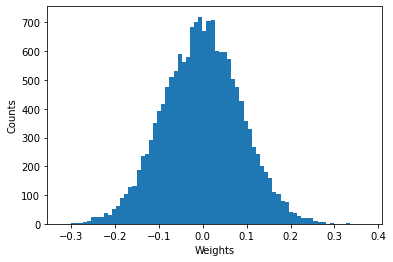

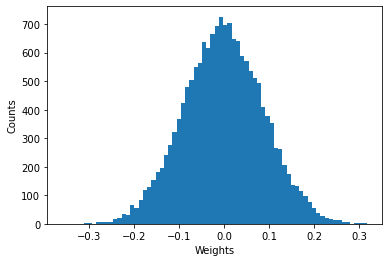

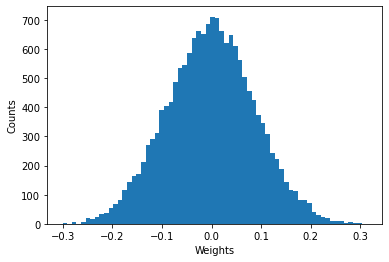

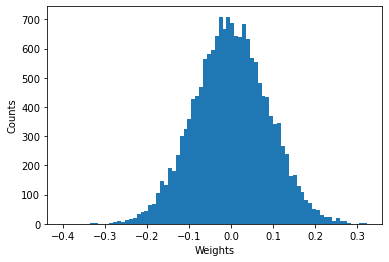

In [8]:
data = sensorium_loader_direct(batch_size_per_gpu, n_gpus)

model = InT_Sensorium_Baseline_Pretrain(prj_name, lr, weight_decay, n_neurons_list, hidden_size, timesteps, kernel_size, \
                    pre_kernel_size, VGG_bool, freeze_VGG, InT_bool, batchnorm_bool, orthogonal_init, \
                    exp_weight, noneg_constraint, visualize_bool, test_dataset, \
                    gaussian_bool, sensorium_ff_bool, clamp_weights, plot_weights, corr_loss, HMAX_bool, \
                    simple_to_complex, n_ori, n_scales, simple_ff_bool, simple_to_complex_gamma, scale_image)

model = model.load_from_checkpoint('/media/data_cifs/projects/prj_sensorium/aarjun1/checkpoints/' + prj_name + '_pre_training/sensorium-epoch=27-val_corr=0.3231509327888489-val_loss=13666371.0.ckpt')

In [ ]:
# Model available here:
sample_image = np.load(images_folder + "0.npy").transpose((1,2,0))

plt.imshow(sample_image, cmap="gray")

In [10]:
import pytorch_lightning as pl
trainer = pl.Trainer(max_epochs = num_epochs, gpus=-1, accelerator = 'dp') #, gradient_clip_val= 0.5, \

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [21]:
plt.imshow(test_dataset.dataset[0].images.cpu().numpy().transpose(1,2,0), cmap="gray")

AttributeError: 

In [25]:
data_key= '21067-10-18'
dataset_names = ['21067-10-18', '22846-10-16', '23343-5-17', '23656-14-22', '23964-4-"22', '26872-17-20']
data.dataset_name = data_key

trainer.test(model, data, 5)

Restoring states from the checkpoint path at 5


FileNotFoundError: Checkpoint at 5 not found. Aborting training.

In [ ]:
len(trainer.responses)

In [ ]:
len(model.test_neural_responses[0])

In [ ]:
job_dir = ("/media/data_cifs/projects/prj_sensorium/arjun/test_neural_responses/checkpoints_sensorium_SQZN11_5_InT_BN_track_all_sep_3t_5k_0003_GAP_6_datasets_gaussian_extra_activ_exc_scale_1_pre_training_trained/")
os.makedirs(job_dir, exist_ok=True)
file_name = os.path.join(job_dir, "neural_responses.npy")

neural_responses = np.load(file_name)

In [ ]:
class samp_inp_obj:
    def __init__(self):
        self.images = torch.tensor(test_dataset.dataset[0].images).unsqueeze(0)
        self.responses = torch.tensor(test_dataset.dataset[0].responses).unsqueeze(0)
samp_inp = samp_inp_obj()

In [ ]:
# samp_inp.images.shape
# model.test_step(samp_inp, 0, 1)

In [ ]:
gt_responses = []
# len(test_dataset.dataset[4000].responses)
for response in test_dataset.dataset:
    gt_responses.append(response.responses)
# gt_responses = torch.cat(, dim = 0)

In [ ]:
result = torch.cat(gt_responses, dim=0)

In [ ]:
len(result)

In [ ]:
len(torch.chunk(torch.tensor(gt_responses), 995))

In [ ]:
gt2 = torch.cat(gt_responses, dim=0)
len(gt_responses)

In [ ]:
len(gt2)

In [ ]:
len(neural_responses[0])

In [ ]:
def model_predictions(model, trainer_lightning, data_lightning, prj_name, device="cpu"):
    model.val_losses = []
    model.min_loss = 1000
    model.test_neural_responses = []

    # Testing
    trainer_lightning.test(model, data_lightning)

    # Saving
    job_dir = os.path.join("/media/data_cifs/projects/prj_sensorium/arjun/test_neural_responses", prj_name)
    os.makedirs(job_dir, exist_ok=True)
    file_name = os.path.join(job_dir, "neural_responses.npy")

    neural_responses = np.load(file_name)

    print('neural_responses :',neural_responses.shape)

    return neural_responses

test_predictions = model_predictions(
            model,
            trainer,
            data.dataloaders_val,
            prj_name = model.prj_name,
            device="cuda",
        )

In [ ]:
# Getting top 100 worst correlations
print("Columns:", live_submission_file.columns)
print("#Trials:", len(live_submission_file))
for index, trial in live_submission_file.iterrows():
    print(len(trial["prediction"])/45646)
    print(len(trial["neuron_ids"]))
    break
    #correlation = corr(predictions, self.responses, axis=0)
    
trial_ids = live_submission_file["trial_indices"]
predictions = live_submission_file["trial_indices"]
image_ids = live_submission_file["trial_indices"]
neuron_ids = live_submission_file["neuron_ids"]

In [ ]:
predictions = np.array([ast.literal_eval(v) for v in live_submission_file["prediction"].values])

responses = [i.responses.cpu().numpy() for i in test_dataset]
# responses = np.array([ast.literal_eval(v) for v in responses])

In [ ]:
trial_idx_sorting_indices = np.argsort(trial_ids)
neuron_ids_sorting_indices = np.argsort(neuron_ids)

print("Trial IDs Sorting Indices:", len(trial_idx_sorting_indices))
print("Neuron IDs Sorting Indices:", len(neuron_ids_sorting_indices))

predictions[trial_idx_sorting_indices, :][:, neuron_ids_sorting_indices]